# Metropolis-Hastings Algorithm

## Overview

The <a href="https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm">Metropolis-Hastings algorithm</a> 
is another methodology which we can use in order to obtain a sequence of random 
samples from a probability distribution from which direct sampling is difficult.

## Metropolis-Hastings Algorithm

Let's consider once more the integral 

$$ I = \int h(x)f(x)dx$$

The Metropolis-Hastings algorithm belongs to 
<a href="https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo">Markov chain Monte Carlo (MCMC)</a> class of algorithms. The idea in MCMC is to construct a Markov chain say $X_1, X_2, \dots, $whose stationary distribution is $f$ [1]. Under certain conditions, and due to the law of large numbers

$$\frac{1}{N}\sum_i h(X_i) \rightarrow_{P} E\left[h(X)\right]=I$$

Simialr to <a href="importance_sampling">importance sampling</a>, the Metropolis-Hastings algorithm assumes an
easy to sample proposal distribution $q(y|x)$. The algorithm then works as follows, see [1],

1. Start by choosing $X_0$ arbitrarily
2. Use the proposal distribution to sample $Y\sim g(Y|X_i)$
3.Evaluate $r$ according to 

$$r(x,y) = min \{\frac{f(y)}{f(x)}\frac{q(x|y)}{q(y|x)}, 1\}$$

and set

$$X_{i+1}=\begin{cases}Y & \text{with probability} & r \\ X_i & \text{with probability} & 1- r \end{cases}$$

----
**Remark**

A simple way for the final step is to generate a random value, say $V$ form $U(0,1)$ then set $X_{i+1}=Y$ if $V < r$ and
$X_{i+1}=X_i$ otherwise.

----

Note that if we choose $q(y|x)$ to be the normal distribution with some variance $\sigma^2$ centered at $x$ i.e. 
the current value
we are looking at, the $q$ will be  symatric, since the normal distribution is symmetric [1]. In this case, the expression
for $r$ above is written as [1]

$$r(x,y) = min \{\frac{f(y)}{f(x_i)}, 1\}$$

The performance of the algorithm in terms of approximating $f$ depends on the proposal distribution
and its parameters. This is shown in the following example. 

## Computational example

Consider the <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">Cauchy distribution</a> 
which has desnity function given by, [1], for $\gamma=1$

$$f(x)=\frac{1}{\pi(1 + x^2)}$$

We want to simulate a Markov chain whose stationary distribution is $f$. We will take the proposal distibution to
to the normal distribution $N(x,\sigma^2)$

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [15]:
# set seed so that we can repeat the experiment
np.random.seed(42)

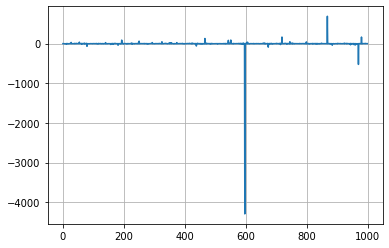

In [21]:
# set seed so that we can repeat the experiment
cauchy_sample = np.random.standard_cauchy(size=1000)

plt.plot(cauchy_sample)
plt.grid(True)
plt.show()

In [16]:
# the length of the chains
N= 1000
sigmas = [0.1, 1.0, 10.0]

The Metropolis-Hastings algorithm, chooses $X_0$ arbitrarily so let $X_0=0$

In [17]:
chains = {}
cauchy_betas = {}
X_0 = 0
for sigma in sigmas:
    
    
    Xcurrent = X_0
    
    chains[str(sigma)]=[Xcurrent]
    cauchy_betas[str(sigma)] = [np.random.standard_cauchy]
    for _ in range(N):
        
        # draw Y
        y = np.random.normal(size=1 , loc=Xcurrent , scale=sigma)
        
        cauchy_ratios = (1 + Xcurrent**2) / (1 + y**2) 
        r = min(cauchy_ratios, 1)
        
        # generate a number from the uniform distribution
        U = np.random.uniform(low=0.0, high=1.0, size=1)
        
        if U < r:
            Xcurrent = y
        
        chains[str(sigma)].append(Xcurrent)
        
        

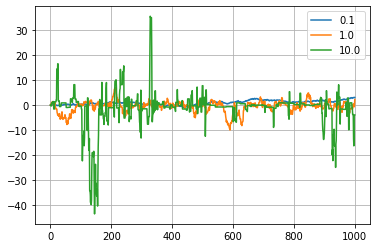

In [18]:
for chain in chains:
    plt.plot(chains[chain], label=chain)
   
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Summary

In this section, we introduced the Metropolis-Hastings algorithm. The Metropolis-Hastings algorithm belongs to 
<a href="https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo">Markov chain Monte Carlo (MCMC)</a> class of algorithms. 
The idea in MCMC is to construct a Markov chain say $X_1, X_2, \dots, $whose stationary distribution is $f$ [1].

Just like importance sampling, the Metropolis-Hastings alorithm utilises a proposal distribution. The resulting 
chain therefore depends on the parameters of proposal distribution.

## References

1. Larry Wasserman, _All of Statistics. A Concise Course in Statistical Inference_, Springer 2003.